 ¡Hola Sharon! Como te va?



 Mi nombre es Facundo Lozano! Un gusto conocerte, seré tu revisor en este proyecto.



 A continuación un poco sobre la modalidad de revisión que usaremos:



 Cuando enccuentro un error por primera vez, simplemente lo señalaré, te dejaré encontrarlo y arreglarlo tú cuenta. Además, a lo largo del texto iré haciendo algunas observaciones sobre mejora en tu código y también haré comentarios sobre tus percepciones sobre el tema. Pero si aún no puedes realizar esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a comentarios y discusiones sobre el tema.



 Encontrará mis comentarios a continuación: **no los mueva, modifique ni elimine**.



 Puedes encontrar mis comentarios en cuadros verdes, amarillos o rojos como este:



 <div class="alert alert-block alert-success">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Exito. Todo se ha hecho de forma exitosa.

 </div>



 <div class="alert alert-block alert-warning">

 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Observación. Algunas recomendaciones.

 </div>



 <div class="alert alert-block alert-danger">



 <b>Comentario del revisor.</b> <a class="tocSkip"></a>



 Necesita arreglos. Este apartado necesita algunas correcciones. El trabajo no puede ser aceptado con comentarios rojos.

 </div>



 Puedes responder utilizando esto:



 <div class="alert alert-block alert-info">

 <b>Respuesta de estudiante.</b> <a class="tocSkip"></a>

 </div>

# Descripcipción del proyecto

<div class="alert alert-block alert-success">
<b>Review General. (Iteración 2) </b> <a class="tocSkip"></a>

Excelente ahora si Sharon, muy bien implementadas las ultimas solicitudes! Ahora si el proyecto se encuentra en condiciones de ser aprobado! Felicitaciones y éxitos dentro de tu camino dentro del mundo de los datos!
    
Saludos Sharon!

<div class="alert alert-block alert-success">

 <b>Review General. (Iteración 1) </b> <a class="tocSkip"></a>

Sharon, siempre me tomo este tiempo al inicio de tu proyecto para comentarte mis apreciaciones generales de esta iteración de tu entrega.

Me gusta comenzar dando la bienvenida al mundo de los datos a los estudiantes, te deseo lo mejor y espero que consigas lograr tus objetivos. Personalmente me gusta brindar el siguiente consejo, "Está bien equivocarse, es normal y es lo mejor que te puede pasar. Aprendemos de los errores y eso te hará mejor programadora ya que podrás descubrir cosas a medida que avances y son estas cosas las que te darán esa experiencia para ser una gran Data Scientist"

Ahora si yendo a esta notebook. Sharon te quiero felicitar porque has logrado resolver todos los pasos implementando grandes lógicas, se ha notado tu manejo sobre python y las herramientas ML utilizadas. Muy bien hecho! Por otro lado hemos tenido un par de detalles que debemos corregir pero que estoy seguro que te demorara unos minutos, te he dejado los comentarios con el contexto necesario para que puedas resolverlo.

Éxitos y espero con ansias a nuestra próxima iteración!

Saludos Sharon!

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

 <div class="alert alert-block alert-success">



 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>



 Hasta aquí excelentes importaciones y configuraciones!

## Cargar datos

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.head()

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281


In [6]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [7]:
df_reviews.duplicated().sum()

0

No se encuentra datos duplicados.

 <div class="alert alert-block alert-success">



 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Por un ladoe excelente carga de los datos y muy buen agregado de metodos para la profundización y comprensión de nuestros datos Sharon, desde el metodo info hasta profundizar en los duplicados, excelente!

## EDA

Veamos el número de películas y reseñas a lo largo de los años.

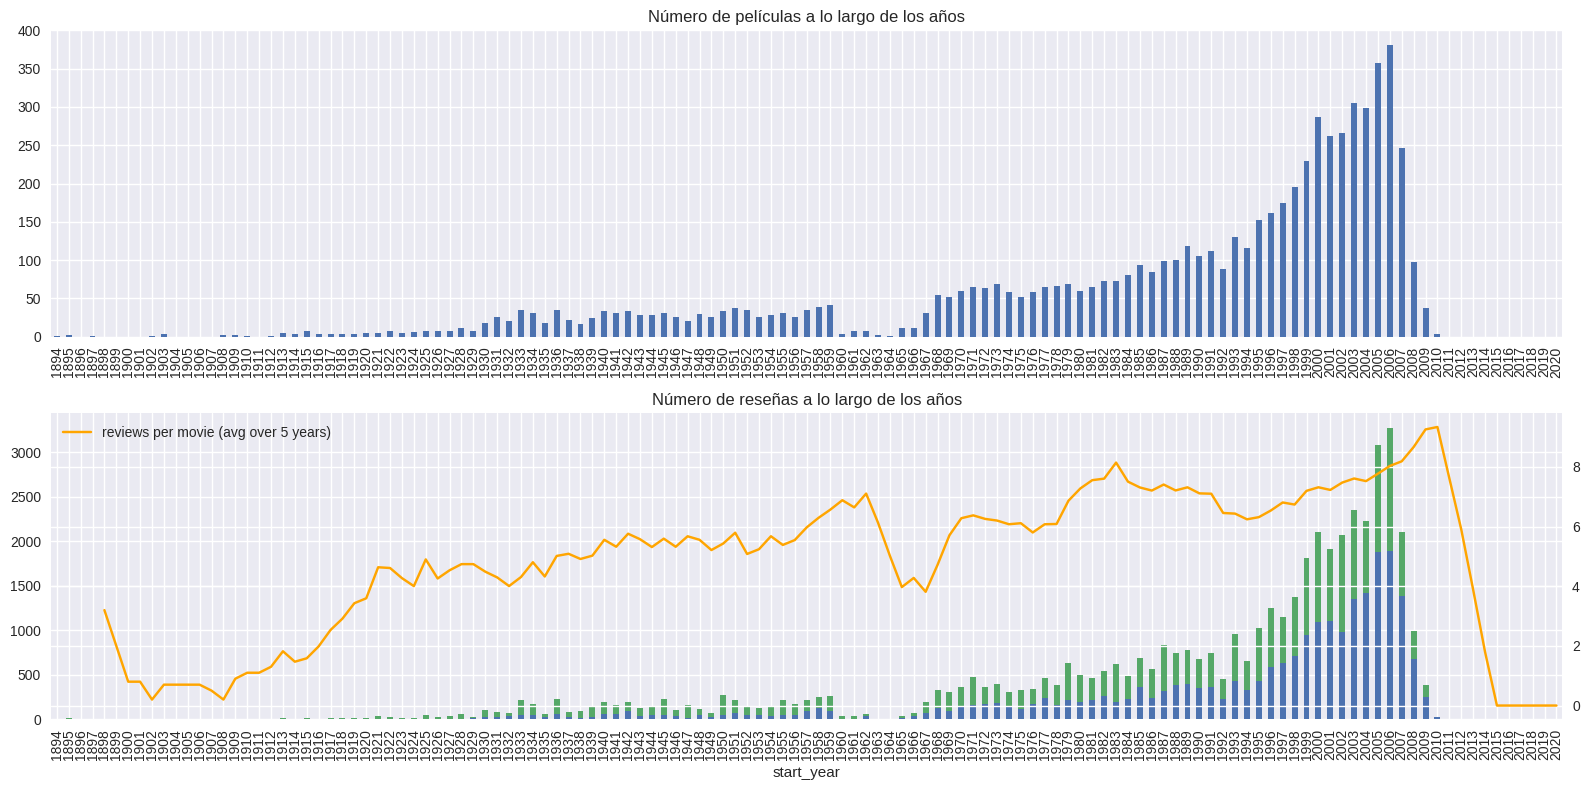

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

Se observa en la gráfica que la distribución del numero de peliculas se asemeja al numero de reseñas de lo usuarios a lo largo de los años, este fue creciente desde el 1966 para luego alcanzar un pico en el año 2006.

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

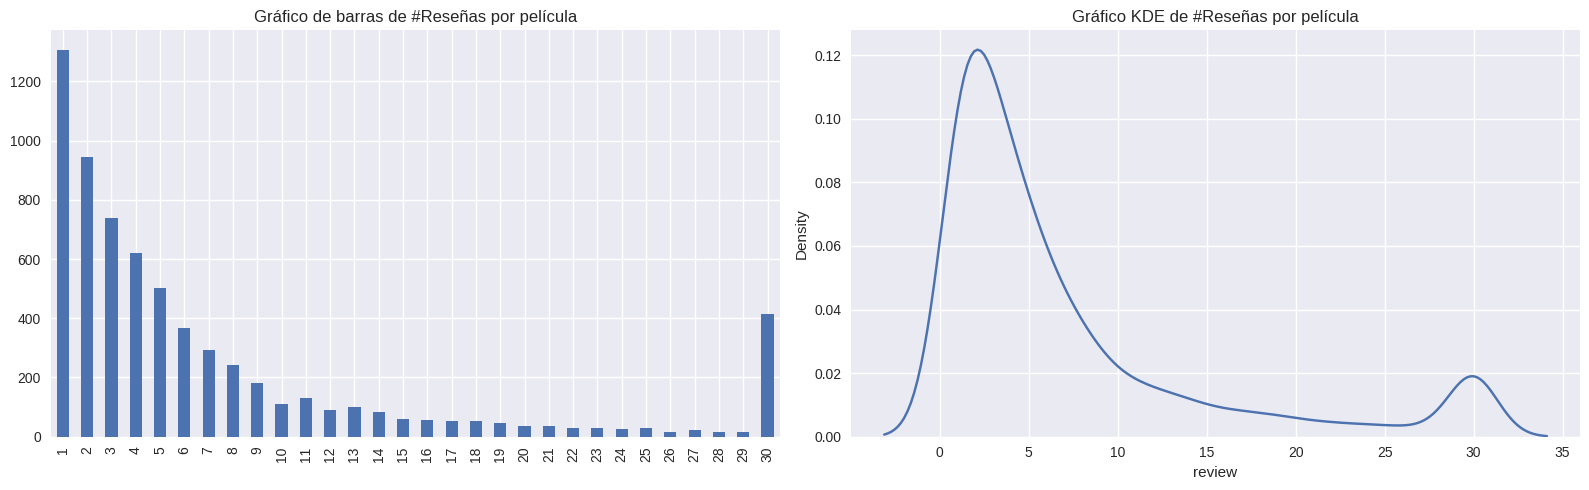

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

Se observa una distribución asimetrica derecha para el número de reseñas de peliculas al agruparlas por *tconst*.

In [10]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

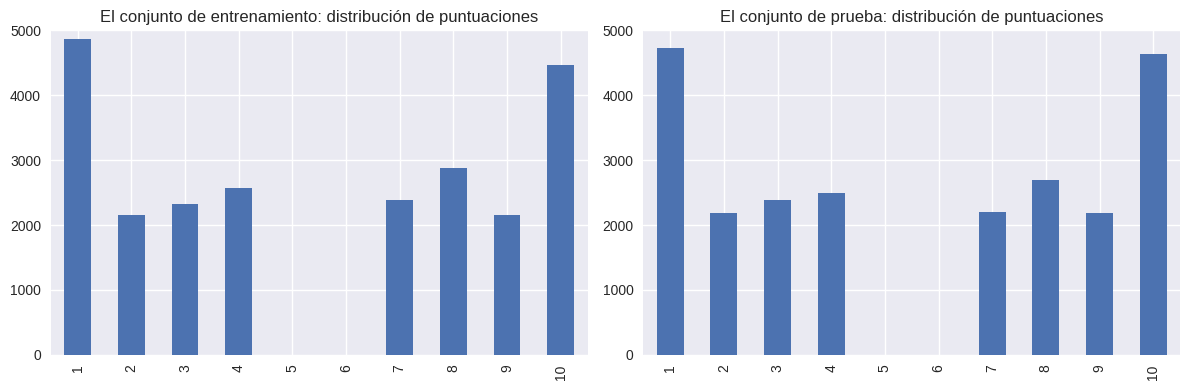

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

Se observa en el gráfico una distribución de puntuaciónes similares tanto en el conjunto de entrenamiento como en el de prueba.

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


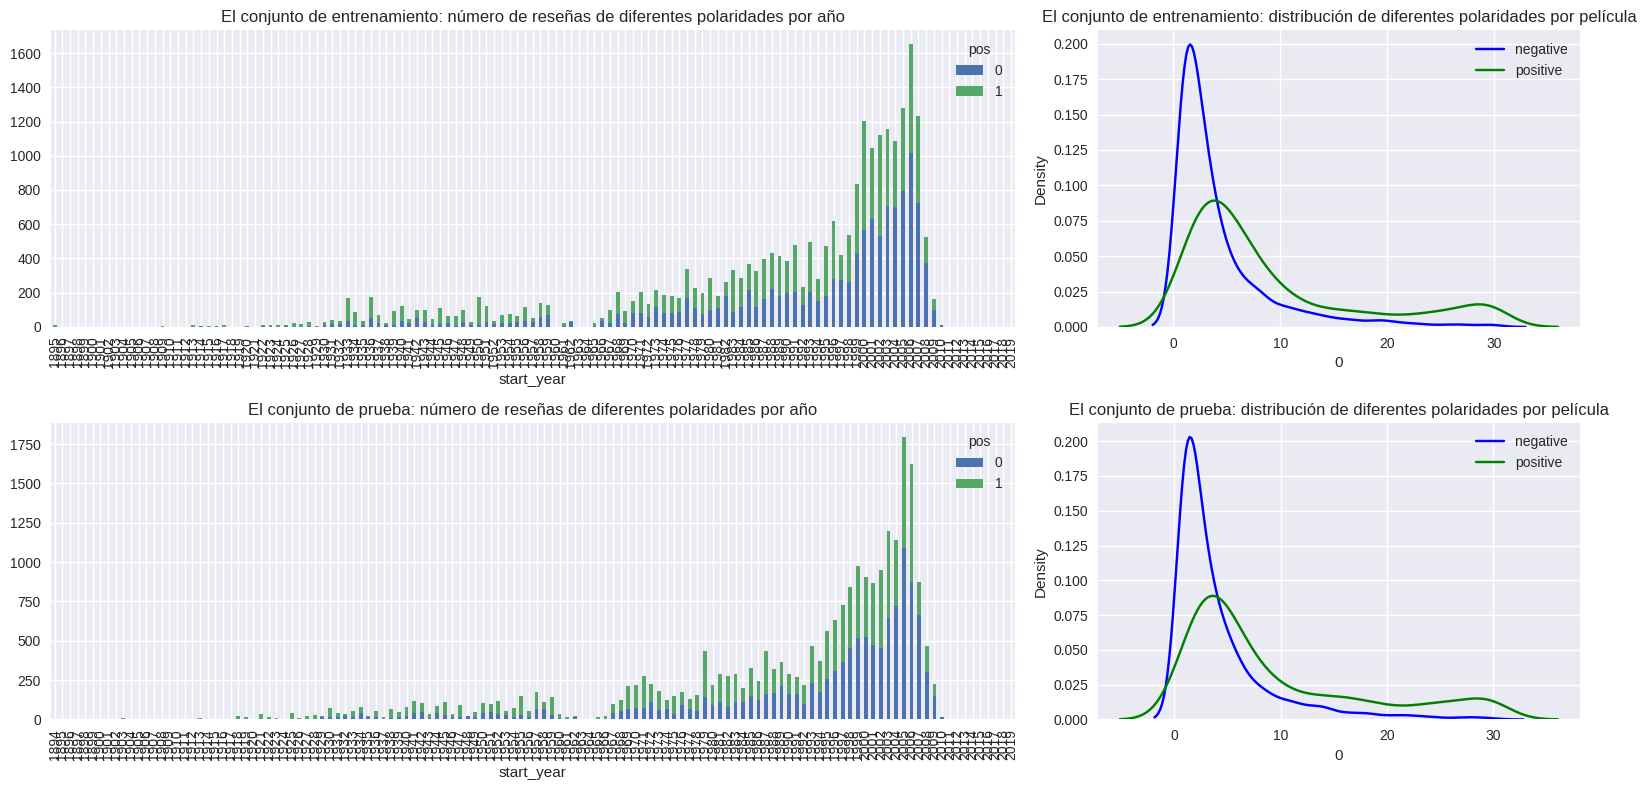

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

Se puede observar que los conjuntos de entrenamiento y de prueba presenta una similar distribución lo cual es útil para entrenar a nuestros modelos y en caso se desea realizar alguna prueba estadística.

 <div class="alert alert-block alert-success">



 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>



 Aquí es importante que por cada gráfica dejemos un comentario interpretandola, te invito a que agregues por cada una algun estilo de conclusión :)
    
    Implementado! Bien hecho!

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [13]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'Curva ROC')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales        
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Exactitud'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Exactitud', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [14]:
import re

def clear_text(text):

    clean_text = re.sub(r"[^a-zA-Z]", " ", text)
    clean_text = " ".join(clean_text.split())

    return clean_text.lower()

normalize_text = []
for i in range(len(df_reviews['review'])):
    normalize_text.append(clear_text(df_reviews.loc[i]['review']))
    
df_reviews['review_norm'] = normalize_text

#df_reviews['review_norm'] = df_reviews['review'].apply(clear_text)# <escribe tu código aquí>
#df_reviews['review_norm'].head()

 <div class="alert alert-block alert-success">



 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>



 Excelente armado de la función encargada de normalizar nuestro corpus de datos!

In [15]:
df_reviews['review_norm'].head()

0    the pakage implies that warren beatty and gold...
1    how the hell did they get this made presenting...
2    there is no real story the film seems more lik...
3    um a serious film about troubled teens in sing...
4    i m totally agree with garryjohal from singapo...
Name: review_norm, dtype: object

## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [16]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


 <div class="alert alert-block alert-success">



 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>



 Partimos los datos en los conjuntos de entrenamiento y testeo. Bien! Sigamos!

## Trabajar con modelos

### Modelo 0 - Constante

In [17]:
from sklearn.dummy import DummyClassifier

           train  test
Exactitud   0.50  0.50
F1          0.67  0.67
APS         0.50  0.50
ROC AUC     0.50  0.50


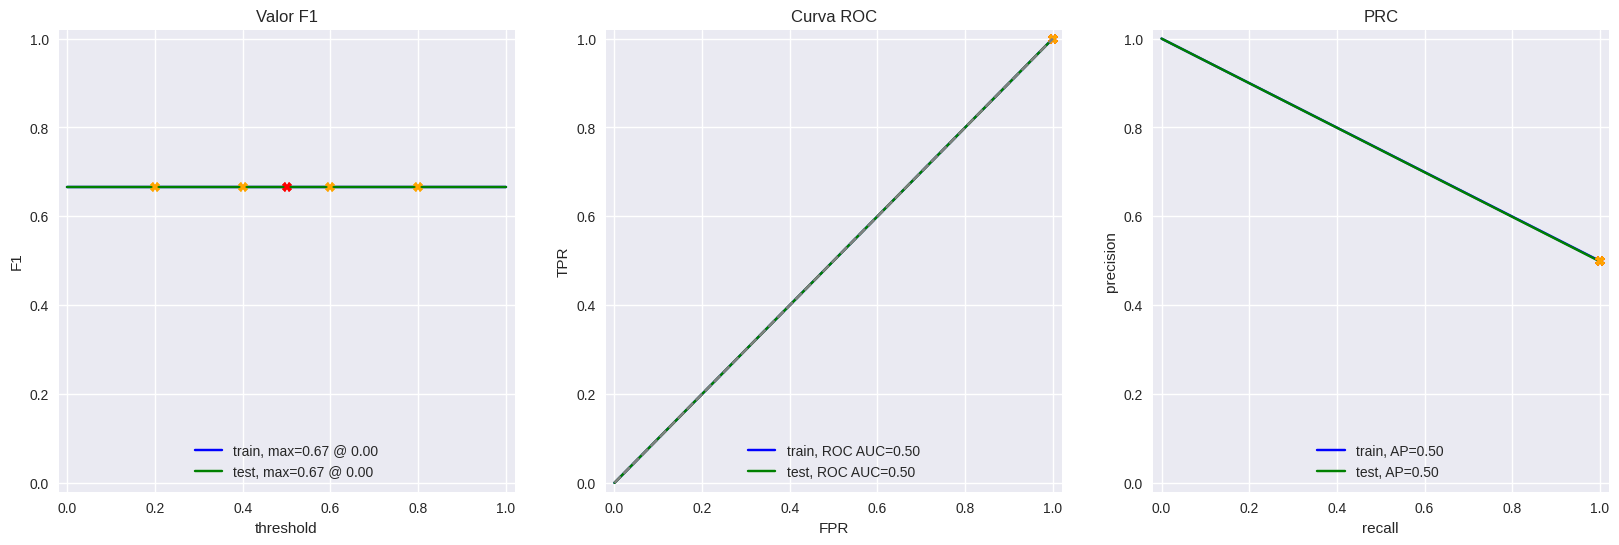

In [18]:
dummy_cl = DummyClassifier(strategy = 'constant', constant = 1)
dummy_cl.fit(df_reviews_train, train_target)
predict_dummy = dummy_cl.predict(df_reviews_test)

evaluate_model(dummy_cl, df_reviews_train, train_target, df_reviews_test, test_target)

 <div class="alert alert-block alert-warning">



 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>



 Aquí la estructura es correcta Sharon, sin embargo debemos corregir unos detalles. El querer un modelo constante nos indica que como valor de strategy tomemos **constant** en vez de **uniform**, a la vez esto nos implicaria agregar el parametro **cosntant=1**. Ademas recordemos implementar la gráfica evaluate para observar todas las métricas y graficos de interes. 

 <div class="alert alert-block alert-success">



 <b>Comentario del revisor. (Iteración 2)</b> <a class="tocSkip"></a>

Implementación perfecta de lo solicitado Sharon, bien hecho!

### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

In [19]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
lemmatizer = WordNetLemmatizer()
def lemmatize_nltk(text):
    tokens = word_tokenize(text.lower())
    
    lemmas = []
    for token in tokens:
        lemmas.append(lemmatizer.lemmatize(token))
    return ' '.join(lemmas)

In [21]:
df_reviews_train['review_lemm_nltk'] = df_reviews_train['review_norm'].apply(lemmatize_nltk)
df_reviews_test['review_lemm_nltk'] = df_reviews_test['review_norm'].apply(lemmatize_nltk)

In [22]:
stop_words = set(stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stop_words)

train_corpus = df_reviews_train['review_lemm_nltk']
test_corpus = df_reviews_test['review_lemm_nltk']

train_features_1 = count_tf_idf.fit_transform(train_corpus)
test_features_1 = count_tf_idf.transform(test_corpus)

train_target_1 = df_reviews_train['pos']
test_target_1 = df_reviews_test['pos']

           train  test
Exactitud   0.94  0.88
F1          0.94  0.88
APS         0.98  0.95
ROC AUC     0.98  0.95


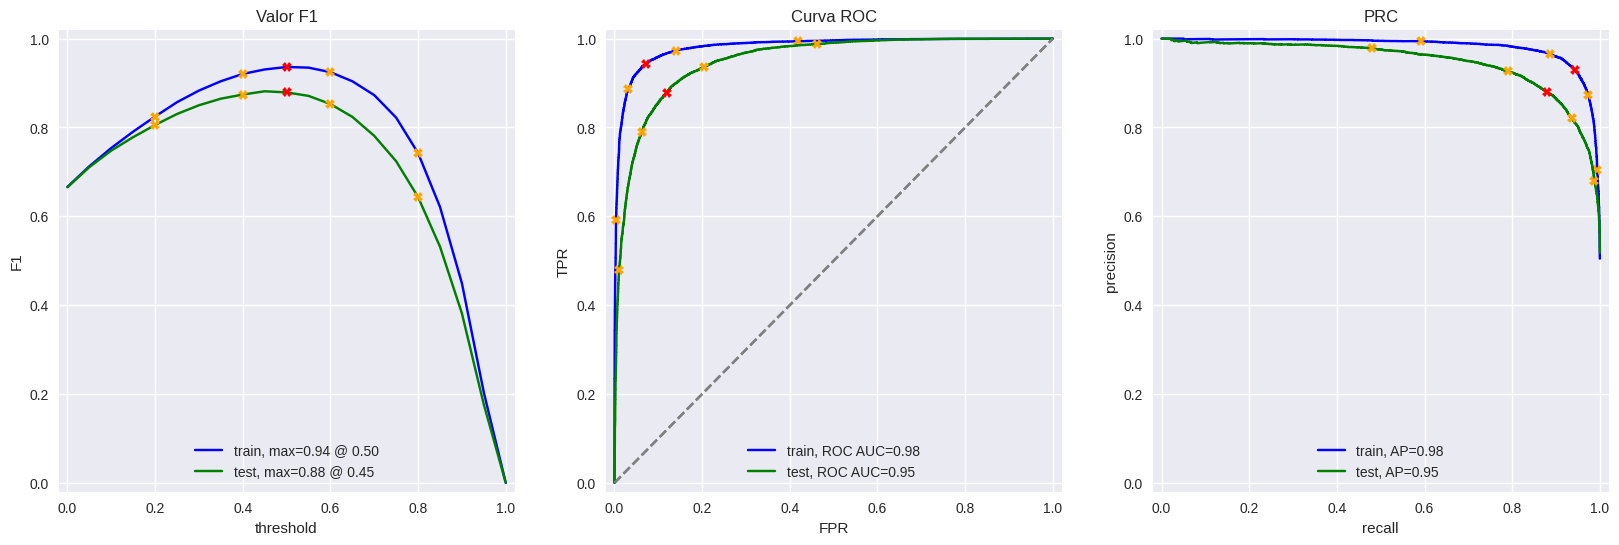

In [23]:
model_1 = LogisticRegression()
model_1.fit(train_features_1, train_target)
evaluate_model(model_1, train_features_1, train_target_1, test_features_1, test_target_1)

 <div class="alert alert-block alert-success">



 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>



 Procedimiento completo y perfecto Sharon, desde la tokenización y lemmatización, filtrado de stopwords y hasta la vectorización del corpus para un posterior entrenamiento y testeo con la función que nos provee los gráficos. Impresionante!

### Modelo 3 - spaCy, TF-IDF y LR

In [24]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [25]:
def text_preprocessing_3(text):
    
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [26]:
reviews_train= df_reviews_train['review_norm'].apply(text_preprocessing_3)
reviews_test = df_reviews_test['review_norm'].apply(text_preprocessing_3)

In [27]:
count_tf_idf_3 = TfidfVectorizer(stop_words=list(stop_words))

train_features_3 = count_tf_idf_3.fit_transform(reviews_train)
test_features_3 = count_tf_idf_3.transform(reviews_test)

train_target_3 = df_reviews_train['pos']
test_target_3 = df_reviews_test['pos']

           train  test
Exactitud   0.93  0.88
F1          0.93  0.88
APS         0.98  0.95
ROC AUC     0.98  0.95


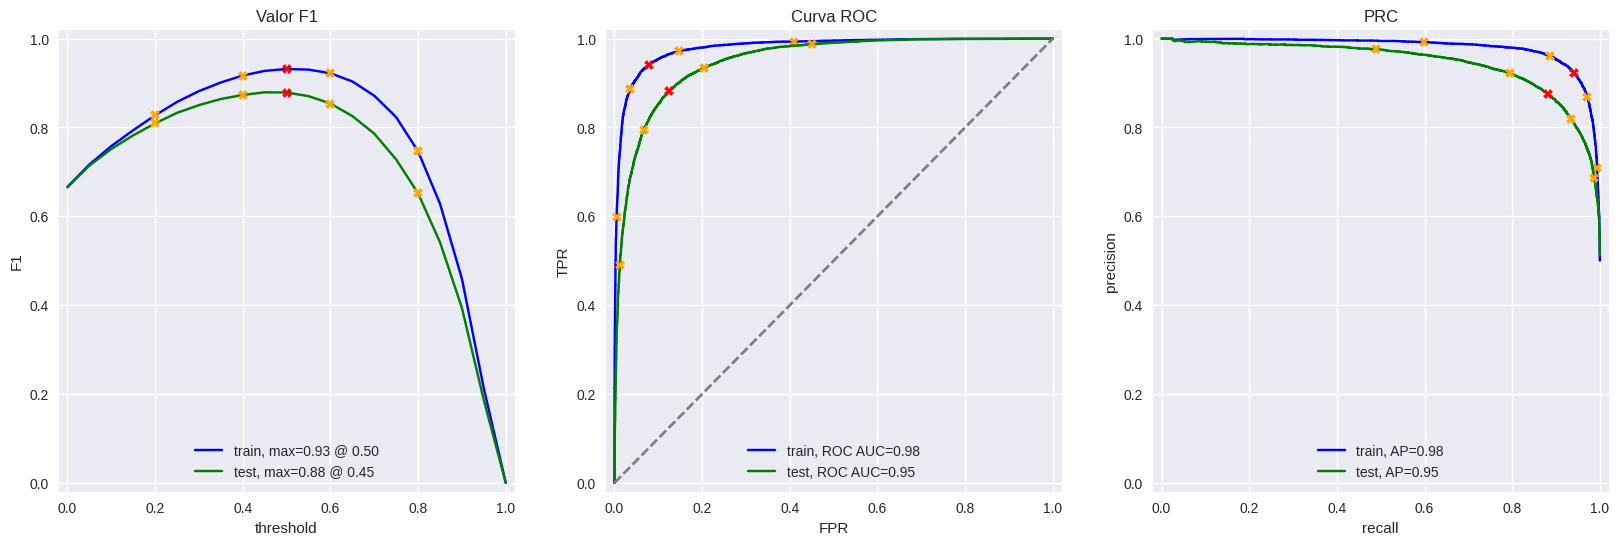

In [28]:
model_3 = LogisticRegression()
model_3.fit(train_features_3, train_target_3)
evaluate_model(model_3, train_features_3, train_target_3, test_features_3, test_target_3)

 <div class="alert alert-block alert-success">



 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>



 Nuevamente un procedimiento perfecto pero esta vez aplicando la tokenización y lemmatización con spacy al igual que el filtrado de stopwords y evaluación, sigamos!

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

In [29]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [30]:
model_lgbm = LGBMClassifier()
param_grid = {
    'n_estimators':[20],
    'seed':[12345],
    'max_depth':list(range(3, 15)),
    'objective':['binary'],
    'learning_rate':[0.05, 0.4]
}

grid_lgbm = GridSearchCV(estimator=model_lgbm, param_grid=param_grid, cv=5, n_jobs=-1)
grid_lgbm.fit(train_features_3, train_target_3)
best_param_lgbm=grid_lgbm.best_params_

In [31]:
print(best_param_lgbm)
print(-grid_lgbm.best_score_)

{'learning_rate': 0.4, 'max_depth': 14, 'n_estimators': 20, 'objective': 'binary', 'seed': 12345}
-0.8288784187766302


           train  test
Exactitud   0.88  0.84
F1          0.89  0.84
APS         0.95  0.91
ROC AUC     0.95  0.92


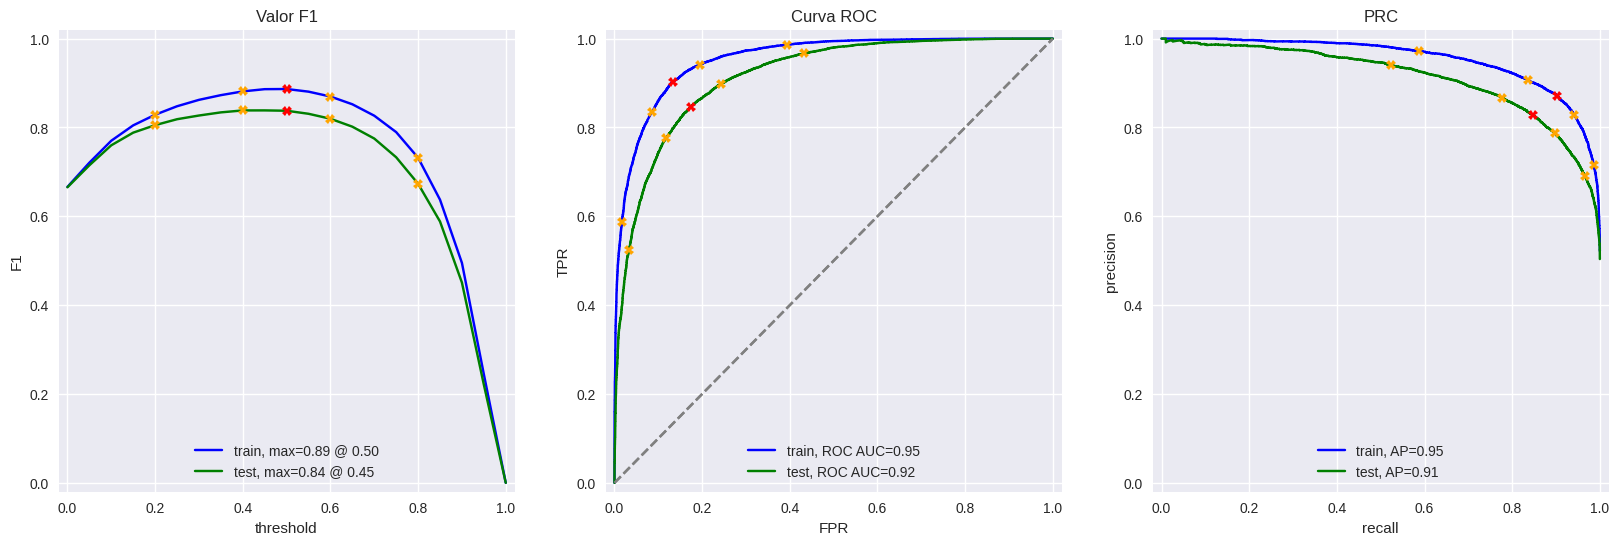

In [32]:
model_lgbm = LGBMClassifier(n_estimators=20, seed=12345, max_depth=14, objective='binary', learning_rate=0.4)
model_lgbm.fit(train_features_3, train_target_3)
evaluate_model(model_lgbm, train_features_3, train_target_3, test_features_3, test_target_3)

 <div class="alert alert-block alert-success">



 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelente Sharon, en este caso reutilizando los datos anteriores. Bien hecho y a la vez felicitarte por implementar una grilla de hiperaparametros!

El **Modelo Bert** se encuentra en comentarios debido a su carga.

import torch
import transformers

tokenizer = transformers.BertTokeni zer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # texto al id de relleno de tokens junto con sus máscaras de atención 
       
    # <escribe tu código aquí para crear ids_list y attention_mask_list>
    for text in tqdm(texts, disable = disable_progress_bar):
        ids = tokenizer.encode(text.lower(), add_special_tokens=True, truncation=True, max_length=max_length)
        padded = np.array(ids + [0]*(max_length - len(ids)))
        attention_mask = np.where(padded != 0, 1, 0)
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Uso del dispositivo {device}.')
    
    # obtener insertados en lotes
    
    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <escribe tu código aquí para crear attention_mask_batch
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

#¡Atención! La ejecución de BERT para miles de textos puede llevar mucho tiempo en la CPU, al menos varias horas
train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)

test_features_9 = BERT_text_to_embeddings(df_reviews_test['review_norm'], force_device='cuda')

print(df_reviews_test['review_norm'].shape)
print(test_features_9.shape)
print(test_target.shape)

200 
sample_train_target = train_target.iloc[:sample_size]
sample_test_target = test_target.iloc[:sample_size]

si ya obtuviste los insertados, te recomendamos guardarlos para tenerlos listos si
np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

y cargar...
with np.load('features_9.npz') as data:
    train_features_9 = data['train_features_9']
    test_features_9 = data['test_features_9']


model_9 = LGBMClassifier()
param_grid = {
    'n_estimators':[20],
    'seed':[12345],
    'max_depth':list(range(3, 10)),
    'objective':['binary'],
    'learning_rate':[0.05, 0.4]
}
grid_lgbm_9 = GridSearchCV(estimator=model_9, param_grid=param_grid, cv=5, n_jobs=-1)
grid_lgbm_9.fit(train_features_9, sample_train_target)
best_params_9 = grid_lgbm_9.best_params_

print(best_params_9)
print(-grid_lgbm_9.best_score_)

 <div class="alert alert-block alert-success">



 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>



Quiero detenerme y felicitarte por querer implementar la arquitectura bert, el hecho de ser un modelo pesado dificulta la implementación en local y el intentarlo es para agredecerte. Felicitaciones Sharon!

## Mis reseñas

In [33]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

normalize_text_2 = []
for i in range(my_reviews.shape[0]):
    normalize_text_2.append(clear_text(my_reviews.iloc[i]['review']))

my_reviews['review_norm'] = normalize_text_2

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didn t expect the reboot to be so good write...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a single...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i really...


 <div class="alert alert-block alert-success">



 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>

Excelentes Reviews Sharon!

### Modelo 2

In [34]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_1.predict_proba(count_tf_idf.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.15:  i did not simply like it not my kind of movie
0.18:  well i was bored and felt asleep in the middle of the movie
0.57:  i was really fascinated with the movie
0.14:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.36:  i didn t expect the reboot to be so good writers really cared about the source material
0.51:  the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.03:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.88:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Modelo 3

In [35]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(count_tf_idf_3.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.20:  i did not simply like it not my kind of movie
0.12:  well i was bored and felt asleep in the middle of the movie
0.48:  i was really fascinated with the movie
0.10:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.26:  i didn t expect the reboot to be so good writers really cared about the source material
0.51:  the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.04:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.92:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


### Modelo 4

In [36]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = count_tf_idf_3
my_reviews_pred_prob = model_lgbm.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.62:  i did not simply like it not my kind of movie
0.38:  well i was bored and felt asleep in the middle of the movie
0.62:  i was really fascinated with the movie
0.50:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.78:  i didn t expect the reboot to be so good writers really cared about the source material
0.68:  the movie had its upsides and downsides but i feel like overall it s a decent flick i could see myse
0.31:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.73:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


 <div class="alert alert-block alert-success">



 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>



 Implementaciones y resultados perfectos!

Como comeentario el modelo BERT

texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

## Conclusiones

1. Las reseñas de peliculas empezó su crecimiento en 1967 para llegar a su pico en el 2006 para luego descender en los proximos años.

2. Para la regresión lineal utilizando NLTK se obtiene un F1_score de 0.88 y una exactitud de 0.88 para el conjunto de prueba, utilizando spaCy, un F1_score de 0.88 y una exactitud de 0.88; por último para un modelo LGBM, un F1_score de 0.84 y una exactitud de 0.84, por lo que la regresión lineal dió un resultado mayor de F1_score.

3. En cuanto al Modelo 2 fue en su mayoría de acuerdo al puntaje dado, la tercera y quinta reseña sin embargo si consideroun puntaje medio cuando este tiene una tendencia al 1. El modelo 3 muestra puntajes similares al del modelo anterior inclusive las reseñas positivas que fueron calificadas como negativas. El modelo 4 realizo una mejora en cuanto a la tercera y quinta reseña al calificarlas cercanas a positiva, sin embargo aumento el puntaje en la primera reseña negativa y la considero como positiva.

 <div class="alert alert-block alert-success">



 <b>Comentario del revisor. (Iteración 1)</b> <a class="tocSkip"></a>



 Una conclusión que demuestra la comprensión de lo hecho a lo largo del trabajo, bien hecho Sharon!

# Lista de comprobación

- [x]  Abriste el notebook
- [ ]  Cargaste y preprocesaste los datos de texto para su vectorización
- [ ]  Transformaste los datos de texto en vectores
- [ ]  Entrenaste y probaste los modelos
- [ ]  Se alcanzó el umbral de la métrica
- [ ]  Colocaste todas las celdas de código en el orden de su ejecución
- [ ]  Puedes ejecutar sin errores todas las celdas de código 
- [ ]  Hay conclusiones 

 <div class="alert alert-block alert-info">

 <b>Muchas gracias por el feedback y la motivación, estaré atenta a si hay alguna observación adicional. Saludos.</b> <a class="tocSkip"></a>

 </div>